In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Setup

In [1]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [2]:
!wget $data -O data-homework.csv

--2021-09-24 18:36:42--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘data-homework.csv’

data-homework.csv   100%[===================>]   6.75M  10.1MB/s    in 0.7s    

2021-09-24 18:36:43 (10.1 MB/s) - ‘data-homework.csv’ saved [7077973/7077973]



In [8]:
df = pd.read_csv('data-homework.csv')
df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [109]:
features = ['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
features_no_target = ['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [13]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


In [14]:
df[features].isna().any()

neighbourhood_group               False
room_type                         False
latitude                          False
longitude                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [15]:
df[features].isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Fill null values weith `0` as requested

In [18]:
my_df = df[features].fillna(0).copy()


In [19]:
my_df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Question 1

## Question

What is the most frequent observation (mode) for the column `neighbourhood_group`?

In [26]:
my_df['neighbourhood_group'].describe()

count         48895
unique            5
top       Manhattan
freq          21661
Name: neighbourhood_group, dtype: object

Seems like Manhattan is the top result, but let's check them all.

In [27]:
my_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

## Answer

The most frequent value is Manhattan.

# Split the data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
np.random.seed(42) # nice

In [30]:
df_full_train, df_test = train_test_split(my_df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [31]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [32]:
# resetting the indices for simplicity
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [33]:
# we store the target separately and delete it from our features
y_train = df_train['price'].values
y_val = df_val['price'].values
y_test = df_test['price'].values

del df_train['price']
del df_val['price']
del df_test['price']

# Question 2

## Question

What are the 2 features with the biggest correlation?

Create the correlation matrix for the numerical features of your train dataset.

In [66]:
cormax = my_df.corr()
cormax

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


In [67]:
np.fill_diagonal(cormax.values, 0)
cormax

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,0.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,0.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.033939,-0.150019,0.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,0.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,0.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,0.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,0.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,0.000000


In [68]:
cormax.max()

latitude                          0.084788
longitude                         0.138516
price                             0.081829
minimum_nights                    0.144303
number_of_reviews                 0.589407
reviews_per_month                 0.589407
calculated_host_listings_count    0.225701
availability_365                  0.225701
dtype: float64

In [56]:
import seaborn as sn

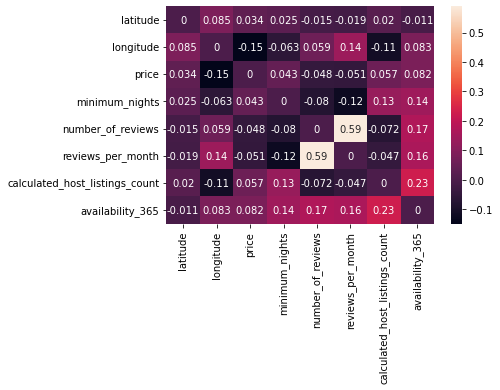

In [69]:
sn.heatmap(cormax, annot=True)
plt.show()

## Answer

The 2 features with the biggest correlation would be number_of_reviews and reviews_per_month

# Make price binary

We will create a new `above_average` binary feature which will be `1` if the price is >= `152`.

In [61]:
above_average = (y_train >= 152)

# Question 3

## Question

Which categorical feature has a higher mutual information score with the binarized price?

In [74]:
df_train.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

We have 2 categorical variables: `neighbourhood_group` and `room_type`.

Calculate the mutual info score between each of these 2 features and the binarized prize.

In [70]:
from sklearn.metrics import mutual_info_score

In [77]:
mutual_info_score(df_train['neighbourhood_group'], above_average).round(2)

0.05

In [78]:
mutual_info_score(df_train['room_type'], above_average).round(2)

0.14

## Answer

`room_type` has the highest mutual information score with the binarized price.

# Question 4

## Question

Train the model. What is the accuracy? (round to 2 decimals)

Let's one-hot encode our categorical features

In [88]:
from sklearn.feature_extraction import DictVectorizer

In [81]:
dv = DictVectorizer(sparse=False)

In [87]:
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)

In [89]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

Let's also convert our target to numbers

In [94]:
above_average = above_average.astype('int')
above_average

array([0, 0, 1, ..., 0, 1, 1])

Now let's train the model.

NOTE: had to use liblinear solver because default lbfgs returned a convergence error.

In [90]:
from sklearn.linear_model import LogisticRegression

In [98]:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, above_average)

LogisticRegression(random_state=42, solver='liblinear')

Let's calculate accuracy

In [99]:
above_average_val = (y_val >= 152)
above_average_val.astype(int)
above_average_val

array([False, False, False, ...,  True, False, False])

In [101]:
# predicting with Train dataset for sanity check
y_pred = model.predict_proba(X_train)[:,1]
predictions = (y_pred >= 0.5)
(above_average == predictions).mean()

0.7928554385247298

In [103]:
# predicting with Val dataset
y_pred = model.predict_proba(X_val)[:,1]
predictions = (y_pred >= 0.5)
(above_average_val == predictions).mean().round(2)

0.79

## Answer

The accuracy of our model with the validation dataset is 0.79

# Question 5

## Question

Which feature has the smallest difference? Choose between:
* neighbourhood_group
* room_type
* number_of_reviews
* reviews_per_month

We have 7 numerical features and 2 categorical. We will get rid of the least useful one.

Let's begin by calculating the reference accuracy (again)

In [136]:
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)

model = LogisticRegression(solver='liblinear', C=1.0, random_state=42, max_iter=1000)
model.fit(X_train, above_average)

y_pred = model.predict_proba(X_val)[:,1]
predictions = (y_pred >= 0.5)
global_acc = (above_average_val == predictions).mean()

print(global_acc)

0.7930258717660292


Now let's drop a feature and train a model without it. Repeat for all features.

In [133]:
accs = []
for f in features_no_target:
    # debug
    #print(f)

    # copy the datasets and remove the feature
    df_train_q5 = df_train.copy()
    del df_train_q5[f]
    df_val_q5 = df_val.copy()
    del df_val_q5[f]

    # One-hot encode and feature matrices
    train_dict_q5 = df_train_q5.to_dict(orient='records')
    val_dict_q5 = df_val_q5.to_dict(orient='records')

    dv.fit(train_dict_q5)

    X_train_q5 = dv.transform(train_dict_q5)
    X_val_q5 = dv.transform(val_dict_q5)

    # create and train model
    model = LogisticRegression(solver='liblinear', C=1.0, random_state=42, max_iter=1000)
    model.fit(X_train_q5, above_average)

    # calculate accuracy with validation dataset
    y_pred_q5 = model.predict_proba(X_val_q5)[:,1]
    predictions_q5 = (y_pred_q5 >= 0.5)
    acc = (above_average_val == predictions_q5).mean()
    accs.append((f, acc))

In [172]:
print(global_acc)
print(accs)

0.7930258717660292
[('neighbourhood_group', 0.7431230187135699), ('room_type', 0.7368851620820125), ('latitude', 0.7902648532569793), ('longitude', 0.79006033336742), ('minimum_nights', 0.7934349115451478), ('number_of_reviews', 0.7922077922077922), ('reviews_per_month', 0.7922077922077922), ('calculated_host_listings_count', 0.7931281317108089), ('availability_365', 0.7857654156866756)]


Finally, we calculate the differences

In [185]:
diffs = []
diffs_tup = []
for i in range(len(accs)):
    # we store the absolute value
    diffs.append(global_acc - accs[i][1])
    diffs_tup.append((accs[i][0], global_acc - accs[i][1]))

In [186]:
diffs

[0.04990285305245934,
 0.05614070968401674,
 0.002761018509049973,
 0.0029655383986092465,
 -0.0004090397791185474,
 0.0008180795582369838,
 0.0008180795582369838,
 -0.00010225994477963685,
 0.007260456079353661]

In [187]:
diffs_tup

[('neighbourhood_group', 0.04990285305245934),
 ('room_type', 0.05614070968401674),
 ('latitude', 0.002761018509049973),
 ('longitude', 0.0029655383986092465),
 ('minimum_nights', -0.0004090397791185474),
 ('number_of_reviews', 0.0008180795582369838),
 ('reviews_per_month', 0.0008180795582369838),
 ('calculated_host_listings_count', -0.00010225994477963685),
 ('availability_365', 0.007260456079353661)]

In [188]:
min_value = min(diffs)
min_index = diffs.index(min_value)
print(min_value)
print(min_index)

-0.0004090397791185474
4


In [189]:
print(accs[min_index])

('minimum_nights', 0.7934349115451478)


## Answer

The smallest difference I got isn't among the 4 listed features on the question, but out of those 4, number_of_reviews and reviews_per_month are tied for the smallest, so I guess either one of them.

(PENDING CONFIRMATION)

# Question 6

## Question

Train a Linear Regression and pick the alpha that gets the best RMSE. If there are multiple options, choose the smallest alpha.

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

Apply the logarithmic transformation to the price column

In [194]:
y_train_lin = np.log1p(y_train)
y_val_lin = np.log1p(y_val)

Let's fit a Ridge regression model on the training data

In [196]:
model = Ridge()
model.fit(X_train, y_train_lin)

Ridge()

In [197]:
from sklearn.metrics import mean_squared_error

In [203]:
y_pred = model.predict(X_val)
print(mean_squared_error(y_val_lin, y_pred, squared=False))
print(mean_squared_error(y_val, np.expm1(y_pred), squared=False))

0.4941224028730396
204.6682474941078


In [202]:
print(y_pred)
print(y_val_lin)
print(np.expm1(y_pred))
print(y_val)

[4.54747652 4.93508075 5.22212995 ... 5.25777134 5.09875631 5.18155525]
[5.01063529 3.93182563 5.01727984 ... 5.170484   4.60517019 4.75359019]
[ 93.39390602 138.0843727  184.32850526 ... 191.05299251 162.8180422
 176.95936712]
[149  50 150 ... 175  99 115]


Let's try now with different alpha values

In [199]:
alphas = [0, 0.01, 0.1, 1, 10]

In [214]:
errors = []
errors_exp = []
for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train_lin)
    y_preds = model.predict(X_val)
    errors.append((a, mean_squared_error(y_val_lin, y_preds, squared=False).round(3)))
    errors_exp.append((a, mean_squared_error(y_val, np.expm1(y_preds), squared=False).round(3)))

In [215]:
print(errors)
print(errors_exp)

[(0, 0.495), (0.01, 0.494), (0.1, 0.494), (1, 0.494), (10, 0.495)]
[(0, 204.383), (0.01, 204.633), (0.1, 204.636), (1, 204.668), (10, 204.92)]


## Answer

On log-space predictions, alpha=0.01 is the smallest alpha with the best RMSE value. On exp-corrected values, the smallest alpha would be 0, but we never used exp-corrected RMSE in the previous lesson.